<a href="https://colab.research.google.com/github/leeyunche/R-code/blob/main/Cluster_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Data
CCData <- read.csv("HCA Exercise.csv")

# Select the variable
cluster.initial <- data.frame(CCData$BALANCE_FREQUENCY,
                CCData$ONEOFF_PURCHASES,
                CCData$CASH_ADVANCE,
                CCData$CREDIT_LIMIT)

In [ ]:
# Check Assumption
# Assumption 1: Representative sample
# Assumption 2: Check outliers
summary(cluster.initial)

# Assumption 3: No multicollinearity issues
cor(cluster.initial)

# Assumption 4: All variables are measured on a metric and comparable scale
str(cluster.initial)

In [4]:
# Standardized variables and create new data frame with standardized variables
z_BALANCE_FREQUENCY <- scale(cluster.initial$CCData.BALANCE_FREQUENCY)
z_ONEOFF_PURCHASES <- scale(cluster.initial$CCData.ONEOFF_PURCHASES)
z_ADVANCE <- scale(cluster.initial$CCData.CASH_ADVANCE)
z_CREDIT_LIMIT <- scale(cluster.initial$CCData.CREDIT_LIMIT)

cluster.z <- data.frame(z_BALANCE_FREQUENCY,
             z_ONEOFF_PURCHASES,
             z_ADVANCE,
             z_CREDIT_LIMIT)

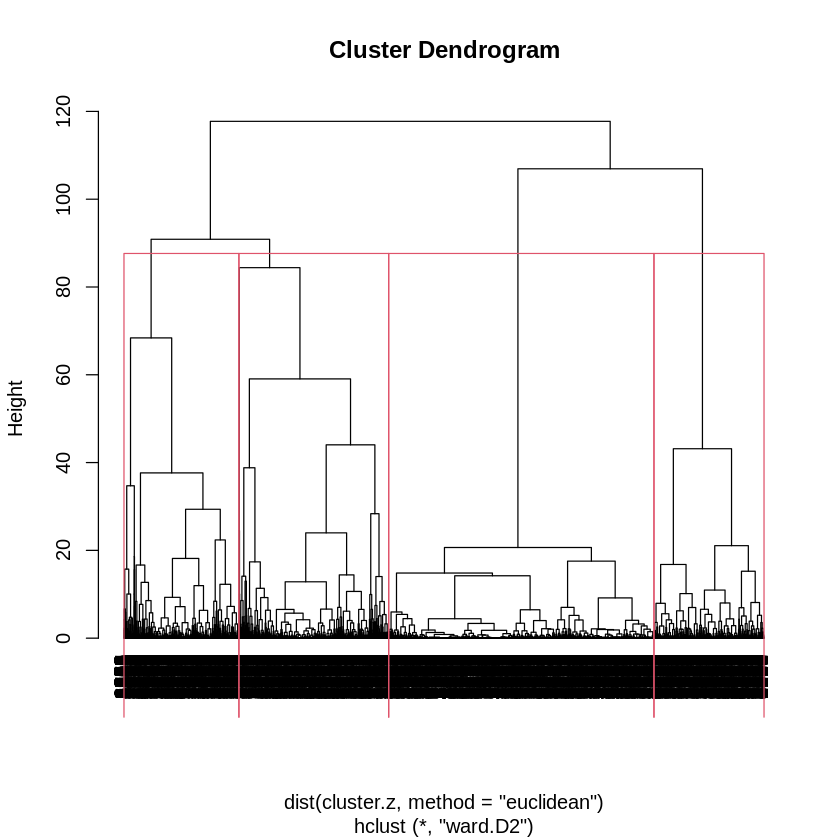

In [6]:
# Conducting hierarchical cluster analysis

# Calculate distance matrix. Then conduct hierarchical cluster analysis
hcc <- hclust(dist(cluster.z, method = "euclidean"), method = "ward.D2")

# Plot dendogram
plot(hcc,hang= -1)

# Setting the number of groups and draw dendogram with red borders around the nGroup clusters
nGroup <- 4
rect.hclust(hcc, k=nGroup)

# Cut tree into nGroup clusters
groups <- cutree(hcc, k=nGroup)

# Add groups to my dataset
hcc.groups <- cbind(CCData, groups)

#export new dataset
write.csv(hcc.groups, "hcc.groups4.csv")